In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_1samp

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


**Data Description**

| Column | Definition |
| :- | :- |
| Country | List of the 179 countries |
| Region | 179 countries are distributed in 9 regions. E.g. Africa, Asia, Oceania, European Union, Rest of Europe and etc. |
| Year | Years observed from 2000 to 2015 |
| Infant_deaths | Represents infant deaths per 1000 population |
| Under_five_deaths | Represents deaths of children under five years old per 1000 population |
| Adult_mortality | Represents deaths of adults per 1000 population |
| Alcohol_consumption | Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old | Hepatitis_B | Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds. |
| Measles | Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds |
| BMI | BMI is a measure of nutritional status in adults. It is defined as a person's weight in kilograms divided by the square of that person's height in meters (kg/m2)
| Polio | Represents % of coverage of Polio (Pol3) immunization among 1-year-olds. |
| Diphtheria | Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds. |
| Incidents_HIV | Incidents of HIV per 1000 population aged 15-49 |
| GDP_per_capita | GDP per capita in current USD |
| Population_mln | Total population in millions |
| Thinness_ten_nineteen_years | Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median. |
| Thinness_five_nine_years | Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median. |
| Schooling | Average years that people aged 25+ spent in formal education |
| Economy_status_Developed | Developed country |
| Economy_status_Developing | Developing county |
| Life_expectancy | Average life expectancy of both genders in different years from 2010 to 2015 |

| Data | Columns |
| :- | :- |
| **Qualitative Variables** | Country |
| | Region |
| | Year |
| | Economy_status_Developed |
| | Economy_status_Developing |
| **Quantitative Variables** | Infant_deaths |
| | Under_five_deaths |
| | Adult_mortality |
| | Alcohol_consumption |
| | Measles |
| | BMI |
| | Polio |
| | Diphtheria |
| | Incidents_HIV |
| | GDP_per_capita |
| | Population_mln |
| | Thinness_ten_nineteen_years |
| | Thinness_five_nine_years |
| | Schooling |
| | Life_expectancy |

In [4]:
df["Economy_status"] = df["Economy_status_Developed"].apply(lambda x: "Developed" if x == 1 else "Developing")

**Berapa rata-rata dan sebaran harapan hidup pada data tiap tahunnya?**

In [5]:
fig_1 = df[["Year","Economy_status","Life_expectancy"]].groupby(["Economy_status", "Year"]).agg([np.mean, np.std]).droplevel(axis = 1, level = 0).reset_index()

In [6]:
fig_1 = df[["Year", "Economy_status","Life_expectancy"]].groupby(["Economy_status","Year"]).agg([np.mean, np.std])

In [7]:
fig_1.unstack('Economy_status').swaplevel(2,1,axis = 1)[[('Life_expectancy','Developed','mean'),
                                                         ('Life_expectancy','Developed','std'),
                                                         ('Life_expectancy','Developing','mean'),
                                                         ('Life_expectancy','Developing','std')]]

Life_expectancy                               
Economy_status       Developed           Developing          
                          mean       std       mean       std
Year                                                         
2000                 76.602703  3.053549  63.691549  9.681660
2001                 76.956757  3.063906  63.964789  9.691279
2002                 77.097297  3.040330  64.226056  9.651962
2003                 77.259459  3.018688  64.541549  9.588906
2004                 77.718919  3.031395  64.900000  9.500272
2005                 77.851351  3.120419  65.252113  9.356787
2006                 78.105405  3.197824  65.646479  9.163454
2007                 78.281081  3.251738  66.062676  8.948153
2008                 78.591892  3.089173  66.489437  8.708036
2009                 78.886486  2.942614  66.914085  8.452501
2010                 79.156757  2.900052  67.333099  8.197160
2011                 79.570270  2.792238  67.729577  7.947253
2012                 79.664865  2.775209  68.139437  7.714304
2013                 79.940541  2.722178  68.515493  7.490782
2014                 80.248649  2.794799  68.863380  7.275807
2015                 80.159459  2.730635  69.197887  7.108116

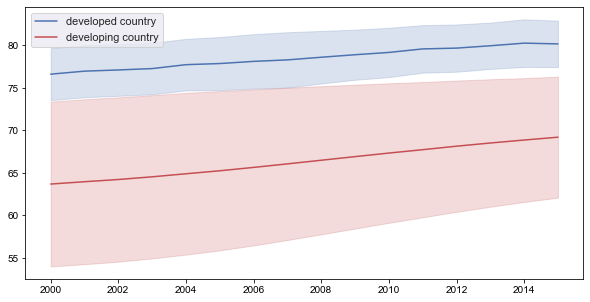

In [8]:
plt.subplots(figsize = (10,5))

sns.set()
x = np.sort(df["Year"].unique())
developed_mean = fig_1.loc[("Developed"),("Life_expectancy","mean")].values
developed_std = fig_1.loc[("Developed"),("Life_expectancy","std")].values

developing_mean = fig_1.loc[("Developing"),("Life_expectancy","mean")].values
developing_std = fig_1.loc[("Developing"),("Life_expectancy","std")].values

plt.plot(x, developed_mean, 'b-', label='developed country')
plt.fill_between(x, developed_mean - developed_std, developed_mean + developed_std, color='b', alpha=0.2)

plt.plot(x, developing_mean, 'r-', label='developing country')
plt.fill_between(x, developing_mean - developing_std, developing_mean + developing_std, color='r', alpha=0.2)

plt.legend()
plt.show()

**Berapa besar proporsi negara berkembang dan negara maju?**

In [9]:
fig_2 = df[["Country","Economy_status"]].drop_duplicates()["Economy_status"].value_counts()

In [10]:
pd.DataFrame(fig_2).rename(columns = {"Economy_status":"Count"})

,Count
Developing,142
Developed,37


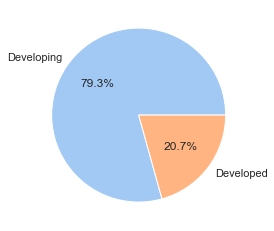

In [11]:
plt.pie(np.array(fig_2), labels = fig_2.keys(), autopct='%1.1f%%',
       colors=sns.color_palette('pastel')[0:2])

plt.show()

**Negara mana yang memiliki rata-rata angka harapan hidup tertinggi dan terendah?**

In [12]:
fig_3 = df[["Country","Life_expectancy"]]

In [13]:
fig_3_mean_std = fig_3.groupby("Country").agg([np.mean, np.std]).sort_values(("Life_expectancy","mean")).tail(5)

In [14]:
fig_3_mean_std

Life_expectancy          
                       mean       std
Country                              
Australia          81.11250  0.993227
Italy              81.38750  1.028186
Iceland            81.57500  0.884308
Switzerland        81.67500  1.075484
Japan              82.45625  0.785679

In [15]:
list(fig_3_mean_std["Life_expectancy"]["mean"])

[81.1125, 81.3875, 81.575, 81.675, 82.45624999999998]

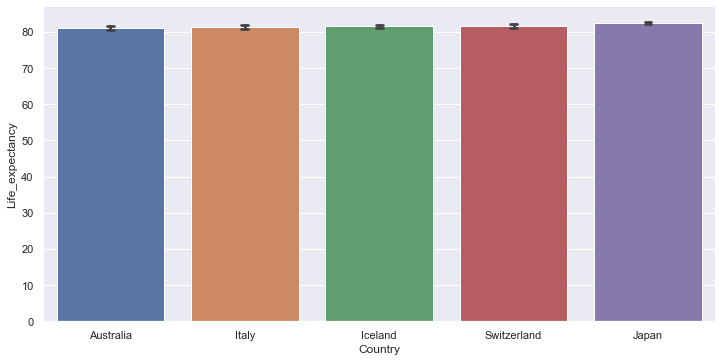

In [16]:
sns.catplot(data=fig_3,
            x="Country",
            y="Life_expectancy",
            kind="bar",
            capsize=.05,
            height=5, aspect=2,
            order=fig_3.groupby("Country").mean().sort_values("Life_expectancy").tail(5).index)
    
plt.show()

In [17]:
fig_3.groupby("Country").agg([np.mean, np.std]).sort_values(("Life_expectancy","mean")).head(5)

Life_expectancy          
                                    mean       std
Country                                           
Lesotho                         45.60625  2.678922
Central African Republic        46.48125  2.315230
Eswatini                        46.69375  4.062424
Sierra Leone                    46.70000  4.426888
Zimbabwe                        48.66250  5.994984

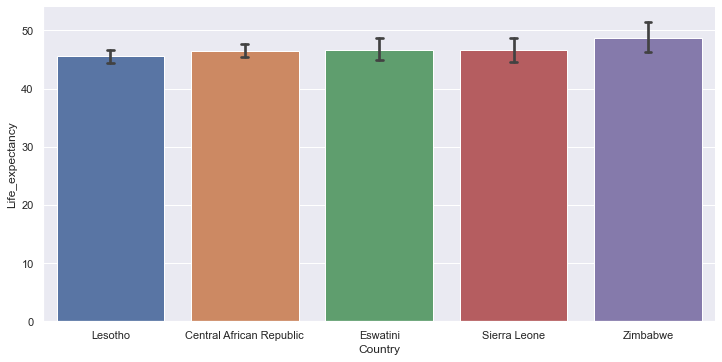

In [18]:
sns.catplot(data=fig_3,
            x="Country",
            y="Life_expectancy",
            kind="bar",
            capsize=.05,
            height=5, aspect=2,
            order=fig_3.groupby("Country").mean().sort_values("Life_expectancy").head(5).index)

plt.show()

**Berapa peluang angka harapan hidup suatu negara lebih dari 75 tahun apabila diketahui merupakan negara maju?**

In [19]:
n_more75_developed = ((df["Life_expectancy"] > 75) & (df["Economy_status"] == "Developed")).sum()

print("The number of country that have life expectancy more than 75 years old and is a developed country:")
print(n_more75_developed)

The number of country that have life expectancy more than 75 years old and is a developed country:
486


In [20]:
n_developed = (df["Economy_status"] == "Developed").sum()

print("The number of country that is a developed country:")
print(n_developed)

The number of country that is a developed country:
592


In [21]:
p_more75_given_developed = n_more75_developed / n_developed

print("The probability that a country's life expectancy is more than 75 years old if given it is a developed country:")
print(f"{p_more75_given_developed * 100:.2f}%")

The probability that a country's life expectancy is more than 75 years old if given it is a developed country:
82.09%


**Berapa peluang angka harapan hidup suatu negara lebih dari 75 tahun apabila diketahui merupakan negara berkembang?**

In [22]:
n_more75_developing = ((df["Life_expectancy"] > 75) & (df["Economy_status"] == "Developing")).sum()

print("The number of country that have life expectancy more than 75 years old and is a developing country:")
print(n_more75_developing)

The number of country that have life expectancy more than 75 years old and is a developing country:
306


In [23]:
n_developing = (df["Economy_status"] == "Developing").sum()

print("The number of country that is a developing country:")
print(n_developing)

The number of country that is a developing country:
2272


In [24]:
p_more75_given_developing = n_more75_developing / n_developing

print("The probability that a country's life expectancy is more than 75 years old if given it is a developing country:")
print(f"{p_more75_given_developing * 100:.2f}%")

The probability that a country's life expectancy is more than 75 years old if given it is a developing country:
13.47%


**Variabel mana yang memiliki korelasi tertinggi terhadap angka harapan hidup?**

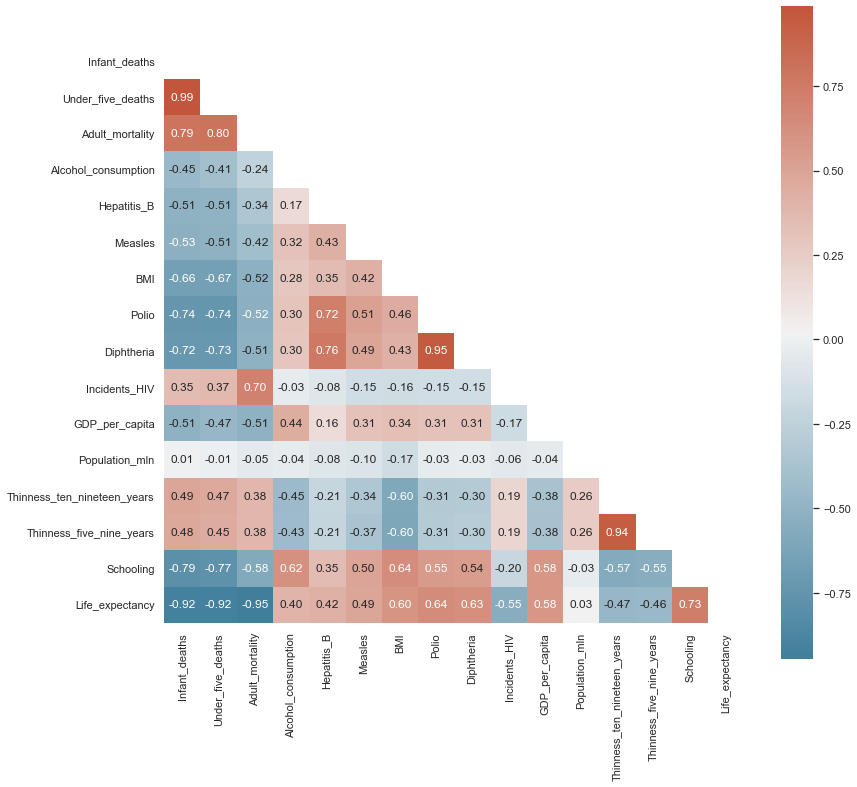

In [29]:
plt.subplots(figsize = (13,12))



corr = df[["Infant_deaths",
           "Under_five_deaths",
           "Adult_mortality",
           "Alcohol_consumption",
           "Hepatitis_B",
           "Measles",
           "BMI", 
           "Polio", 
           "Diphtheria", 
           "Incidents_HIV", 
           "GDP_per_capita",
           "Population_mln", 
           "Thinness_ten_nineteen_years",
           "Thinness_five_nine_years", 
           "Schooling",
           "Life_expectancy"]].corr()

sns.set_theme(style="white")

sns.heatmap(corr,
            cmap=sns.diverging_palette(230, 20, n=200, as_cmap=True),
            square=True, 
            mask = np.triu(np.ones_like(corr, dtype=bool)), 
            cbar_kws={"shrink": 1.},
            annot = True,
            fmt='.2f')
    
plt.show()

**Apakah rata-rata angka harapan hidup negara maju lebih dari 80 tahun?**

In [26]:
avg_country = df.loc[df["Economy_status"] == "Developed", ["Country", "Life_expectancy"]]\
              .groupby("Country")\
              .mean()\
              .reset_index()

In [27]:
ttest, pvalue = ttest_1samp(a = avg_country["Life_expectancy"], popmean = 80, alternative = "less")

In [28]:
print(f"t-statistics: {ttest}")
print(f"p-value: {pvalue}")

t-statistics: -3.0833301654067027
p-value: 0.001957980940133423
